In [ ]:
figsize('inline_short')

from sp14.oskmeans import *

In [ ]:
# Illustration of OSKMeans

km = OSKmeans(3, 2)
print('Centroids before update:')
display(km.centroids)

ps = [
    *[[1, 0]] * 20,
    *[[0, 1]] * 20,
    *[[-1, 0]] * 20,
]
for p in ps:
    km.update(p)
print()
print('Centroids after update:')
display(km.centroids)

Centroids before update:


array([[ 0.818, -0.576],
       [-0.307, -0.952],
       [ 0.648,  0.761]])


Centroids after update:


array([[ 0.998, -0.064],
       [-0.963, -0.271],
       [ 0.077,  0.997]])

In [ ]:
# Toy example: create 3 2D clumps sampled from gaussians on angle and log-magnitude, and learn 10 means

true_centroids = [
    # anglemean, anglesd, logmagmean, logmagsd
    [1.0, 0.1, 1.0, 0.35],
    [2.0, 0.3, 1.0, 0.2],
    [4.0, 0.5, 0.7, 0.2],
]
samples = [[] for _ in true_centroids]

np.random.seed(0)
km = OSKmeans(10, 2)

for index in range(10000):

    # sample from cluster index % 3
    cluster_id = index % len(true_centroids)
    angle = np.random.normal(true_centroids[cluster_id][0], true_centroids[cluster_id][1])
    magnitude = np.exp(np.random.normal(true_centroids[cluster_id][2], true_centroids[cluster_id][3]))
    sample = [np.sin(angle) * magnitude, np.cos(angle) * magnitude]

    # store that to the data list, along with its true identity
    if index < 500:
        samples[cluster_id].append(sample)

    # run it through kmeans
    km.update(sample)

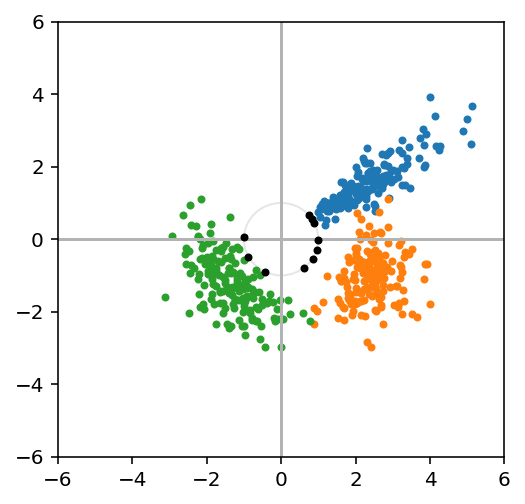

In [ ]:
with with_figsize('square', width=4):
    ax = plt.gca()
    ax.set_xlim(-6, 6); ax.set_ylim(-6, 6)
    ax.add_artist(plt.Circle((0, 0), 1, color=[0.9] * 3, fill=False))
    for sample in samples:
        plt.plot([s[0] for s in sample], [s[1] for s in sample], '.')
    plt.axvline(0, color=[0.7] * 3); plt.axhline(0, color=[0.7] * 3)
    plt.plot([c[0] for c in km.centroids], [c[1] for c in km.centroids], 'k.')
    plt.show()